In [1]:
from cedar.init import *
import matplotlib.pyplot as plt

loaded packages: ['os', 'osp', 'shutil', 'base64', 'json', 'cv2', 'random', 'warnings', 'np', 'pd', 'plt', 'sns', 'alt', 'tqdm', 'Image', 'ImageDraw', 'BytesIO', 'defaultdict', 'color_list', 'draw', 'draw_lines', 'put_text', 'putText', 'imshow', 'dict2obj', 'config', 'Config', 'Dict2Obj', 'tools', 'logger', 'init_logger', 'rmtree_makedirs', 'split_filename', 'timeit', 'create_name', 'run_subprocess', 'get_file_md5', 'find_duplicate_filenames', 'move_file', 'imread_imwrite', 'imread', 'imwrite', 'iou', 'calculate_iou', 'merge_boxes', 'roate_image', 'io', 'array_to_base64', 'path_to_url', 'url_to_path', 'find_image_path', 'check_xml', 'create_xml', 'write_xml', 'read_xml', 'xml_to_dict', 'read_xml_as_dict']


In [55]:
def _create_kernel(step, is_row):
    """创建用于过滤的卷积核"""
    kernel = np.ones((1, step * 2 + 1), np.uint8)
    kernel[:, 0:step] = 1
    kernel[:, step:] = 0
    kernel[0, step] = 100
    if not is_row:
        kernel = kernel.T
    return kernel


def filter_by_distance(edges, step, is_row=True):
    """提取canny边缘之后转化为（0｜1）,
        然后过滤两两像素 垂直or水平距离小于step的 像素。
    Args:
        edges(np.array:np.uint8): （0｜1）
        step(int): 距离
        is_row(bool): False or True
    """
    edges = cv2.copyMakeBorder(edges, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=1)

    kernel = _create_kernel(step, is_row)

    result_1 = cv2.filter2D(edges, -1, kernel)
    result_1[result_1 == 100] = 255
    result_1[result_1 < 255] = 0

    # 反转kernel，然后进行卷积
    result_2 = cv2.filter2D(edges, -1, np.flip(kernel))
    result_2[result_2 == 100] = 255
    result_2[result_2 < 255] = 0

    # 两个卷积的结果相加，得到最终的结果
    edges_result = result_1 + result_2
    edges_result = np.array(edges_result, dtype=bool).astype(np.uint8)
    return edges_result[1:-1, 1:-1], kernel

In [56]:
import numpy as np
import cv2

edges = np.random.randint(0, 2, (10, 10), dtype=np.uint8)  # 假设的边缘图像

edges_row, kernel = filter_by_distance(edges, step=3, is_row=True)
edges_row_show = edges.copy()
edges_row_show[edges_row == 1] = 2

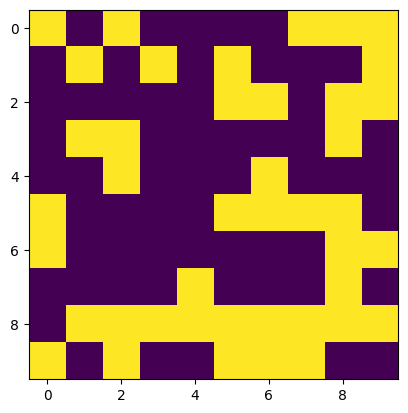

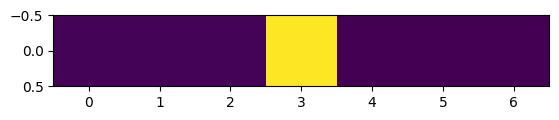

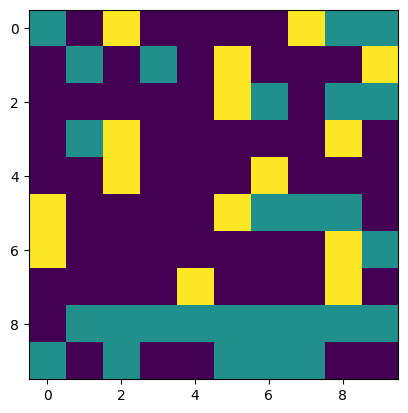

In [61]:
plt.imshow(edges)
plt.show()

plt.imshow(kernel)
plt.show()

plt.imshow(edges_row_show)
plt.show()